## Core Workflow: Calculate scores 
Purpose: Calculate relative accuracy and other statistics
<br>

In [18]:
import csv
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib as pltt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import geopandas as gpd
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [19]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [20]:
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [ ]:

datasets_all = [
    'pred_LA_2009_linear_sika+gg+ss+smote_imitgg_norm_rm-hi-alb_9-14.csv',
#     'pred_LA_2009_linear_sika+gg+ss+smote_imitgg_org_rm-hi-alb_9-14.csv',
#     'pred_LA_2009_linear_sika+gg_imitgg_norm-exp-own_9-6.csv',
#     'pred_LA_2009_linear_sika+gg_imitgg_norm-exp-all_9-9.csv',
#     'pred_LA_2009_linear_sika+gg_imitgg_norm-exp-own_9-9.csv'
               ]

datasets_decision = [
#     'pred_LA_2009_decision_sika+gg+ss+smote_imitgg_norm_rm-outlr_9-16.csv',
    'pred_LA_2009_decision_sika+gg+ss+smote_imitgg_norm_rm-outlr_9-16_v4.csv'
                    ]

In [ ]:
# function for validation data

def get_order(dataset, num_samples):
    filepath = 'data/' + dataset
    df_test = pd.read_csv(filepath)  
    df_samp = df_test.sample(n=num_samples)
    df_sort1 = df_samp.sort_values(by="Scored Labels")
    df_sort1['index_prediction'] = np.arange(len(df_sort1))
    df_sort2 = df_sort1.sort_values(by="expected_albedo")
    df_sort2['index_expected'] = np.arange(len(df_sort2))
    df_sort2
    print 
    ax = df_sort2.plot.bar(x='index_expected', y='index_prediction', rot=0, color='#FF8577', legend=False)
    plt.axis('off')

In [ ]:
# function for all other model

def get_order_BW(dataset, num_samples, width, save=False, plot=True):
    
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = 18
    plt.rcParams["figure.figsize"] = fig_size
    filepath =  dataset
    df_test = pd.read_csv(filepath)  
    df_samp = df_test.sample(n=num_samples)
    df_sort1 = df_samp.sort_values(by="Scored Labels")
    df_sort1['index_prediction'] = np.arange(len(df_sort1))
    df_sort2 = df_sort1.sort_values(by="gg_prediction")
    df_sort2['index_expected'] = np.arange(len(df_sort2))
    a = df_sort2['index_prediction'].tolist()
    
    lt = len(df_test)
    l = len(a)

    inv_count = 0
    for i in range(l): 
        for j in range(i + 1, l): 
            if (a[i] > a[j]): 
                inv_count += 1
    ratio = inv_count/lt
    
    print ()
    print ('Inversions: '+str(inv_count)+" (Ratio: "+str(ratio)+")")
    
    if save == True:
        plt.savefig('Relative_Accuracy_'+dataset.split('.')[0]+'.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=1,
            frameon=None, metadata=None)
    if save == False:
        pass
    
#     print 
    if plot == True:
        ax = df_sort2.plot.bar(x='index_expected', y='index_prediction', rot=0, color='#FF8577', legend=False)
        plt.axis('off')
        return inv_count
    if plot == False:
        pass

In [ ]:
# function for decision forest model

def get_order_BW_df(dataset, num_samples, width, save=False, plot=True):
    
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = 18
    plt.rcParams["figure.figsize"] = fig_size
    filepath = dataset
    df_test = pd.read_csv(filepath) 
    df_test = df_test[df_test.gg_prediction != 0] # ignore samples where George predicted o albedo
    df_samp = df_test.sample(n=num_samples)
    df_sort1 = df_samp.sort_values(by="Scored Label Mean")
    df_sort1['index_prediction'] = np.arange(len(df_sort1))
    df_sort2 = df_sort1.sort_values(by="gg_prediction")
    df_sort2['index_expected'] = np.arange(len(df_sort2))
    a = df_sort2['index_prediction'].tolist()
    
    lt = len(df_test)
    l = len(a)

    inv_count = 0
    for i in range(l): 
        for j in range(i + 1, l): 
            if (a[i] > a[j]): 
                inv_count += 1
    ratio = inv_count/lt
    
    print ()
    print ('Inversions: '+str(inv_count)+" (Ratio: "+str(ratio)+")")
    
    if save == True:
        plt.savefig('Relative_Accuracy_'+dataset.split('.')[0]+'.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=1,
            frameon=None, metadata=None)
    if save == False:
        pass
    
#     print 
    if plot == True:
        ax = df_sort2.plot.bar(x='index_expected', y='index_prediction', rot=0, color='#FF8577', legend=False)
        plt.axis('off')
        return inv_count
    if plot == False:
        pass

### Get order for all types of models

In [ ]:
for dataset in datasets_all:
    print (dataset)
    order = get_order_BW(dataset, 14000, 300, save=False, plot=True)
    print()

### Get order for decision forest models

In [ ]:
for dataset in datasets_decision:
    print (dataset)
    order = get_order_BW_df(dataset, 14000, 300, save=False, plot=True)
    print()

In [41]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import pandas as pd
from shapely.geometry import box
import geopandas as gpd


# Import data
# LA_2009 = gpd.read_file('pred_LA_city_2009_train-50m_pred-rf-norm_10-23_trim.shp')

# LA_2012 = gpd.read_file('pred_LA_city_2012_train-50m_pred-rf-norm_10-23_trim.shp')

# LA_2014 = gpd.read_file('pred_LA_city_2014_train-50m_pred-rf-norm_10-23_trim.shp')

# LA_2016 = gpd.read_file('pred_LA_city_2016_train-50m_pred-rf-norm_10-23_trim.shp')

# LA_2018 = gpd.read_file('pred_LA_city_2018_train-50m_pred-rf-norm_10-23_trim.shp')

# gg_2009 = gpd.read_file('LosAngeles_final_albedo_dataset_key_vars_prj.shp')
# gg_2009.head()

In [5]:
# print(LA_2009.shape[0])
# df_2009 = LA_2009.sort_values('total_pixe', ascending=False).drop_duplicates('roof_no').sort_index()
# print(df_2009.shape[0])

1418816
1143885


In [10]:
# print(gg_2009.shape[0])
# gg_LA_2009 = gg_2009.drop_duplicates('roofID').sort_index()
# print(gg_LA_2009.shape[0])

1130120
1130120


In [31]:
print(LA_2012.shape[0])
df_2012 = LA_2012.sort_values('total_pixe', ascending=False).drop_duplicates('roof_no').sort_index()
print(df_2012.shape[0])

1422748
1143697


In [6]:
# print(LA_2014.shape[0])
# df_2014 = LA_2014.sort_values('total_pixe', ascending=False).drop_duplicates('roof_no').sort_index()
# print(df_2014.shape[0])

1382259
1120529


In [43]:
print(LA_2016.shape[0])
df_2016 = LA_2016.sort_values('total_pixe', ascending=False).drop_duplicates('roof_no').sort_index()
print(df_2016.shape[0])

1268523
1120490


In [32]:
print(LA_2018.shape[0])
df_2018 = LA_2018.sort_values('total_pixe', ascending=False).drop_duplicates('roof_no').sort_index()
print(df_2018.shape[0])

1155565
1096061


In [78]:
# Roads within region
LA_joined = gpd.sjoin(df_2009, 
                         df_2012, 
                         how="inner", 
                         op='intersects')
print(LA_joined.shape[0])
LA_joined.head()

1326903


,Scored Lab_left,roof_no_left,total_pixe_left,geometry,index_right,Scored Lab_right,roof_no_right,total_pixe_right
0,0.251415,11708,927,"POLYGON ((-118.16804530189 34.12337675178983, ...",1,0.301787,11708,914
3,0.096289,38702,15,POLYGON ((-118.1855985871061 34.13460827061152...,3,0.086999,38702,17
4,0.199429,30940,24,POLYGON ((-118.1854432216173 34.13867725387502...,5,0.161819,30940,24
1380053,0.204400,1981400,53,POLYGON ((-118.1854360301648 34.13870045210884...,5,0.161819,30940,24
4,0.199429,30940,24,POLYGON ((-118.1854432216173 34.13867725387502...,888296,0.214585,1981400,54


In [12]:
img_info= LA_joined[['Scored Lab','CALIB_SR']].apply(tuple, axis=1)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
import math

gg_predictions=[]
scored_labels=[]


cnt = -1
nan_cnt=0
for Y, X in img_info.iteritems():
    cnt = cnt + 1
    
#     footprint_shape=X[0]
    gg_prediction=X[1]
    scored_label = X[0]
    
    if math.isnan(scored_label) == False:    
        gg_predictions.append(gg_prediction)
        scored_labels.append(scored_label)
    else:
        nan_cnt+=1
        
print('number of NAN in prediction: ', nan_cnt)
        
gg_prediction_arr = np.asarray(gg_predictions)
scored_labels_arr = np.asarray(scored_labels)

print(len(gg_prediction_arr))
print(len(scored_labels_arr))

gg_prediction_arr = gg_prediction_arr[~numpy.isnan(gg_prediction_arr)]
scored_labels_arr = scored_labels_arr[~numpy.isnan(scored_labels_arr)]

print(len(gg_prediction_arr))
print(len(scored_labels_arr))

mas = mean_absolute_error(gg_prediction_arr, scored_labels_arr)
ms = mean_squared_error(gg_prediction_arr, scored_labels_arr)
rms = sqrt(mean_squared_error(gg_prediction_arr, scored_labels_arr))

print('Mean Absolute Error: ',mas)
# print('Mean Squared Error: ',ms)
print('Root Mean Squared Error: ',rms)


number of NAN in prediction:  0
1216215
1216215
1216215
1216215
Mean Absolute Error:  0.03900229783762373
Root Mean Squared Error:  0.06606484404926287


In [26]:
# function for decision forest model

def get_order_BW_df(dataset, num_samples, width, save=False, plot=True):
    
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = 24
    plt.rcParams["figure.figsize"] = fig_size
    df_test = dataset
    df_test = df_test[df_test.CALIB_SR != 0] # ignore samples where George predicted o albedo
    df_samp = df_test.sample(n=num_samples)
    df_sort1 = df_samp.sort_values(by="Scored Lab")
    df_sort1['index_prediction'] = np.arange(len(df_sort1))
    df_sort2 = df_sort1.sort_values(by="CALIB_SR")
    df_sort2['index_expected'] = np.arange(len(df_sort2))
    a = df_sort2['index_prediction'].tolist()
    
    lt = len(df_test)
    l = len(a)

    inv_count = 0
    for i in range(l): 
        for j in range(i + 1, l): 
            if (a[i] > a[j]): 
                inv_count += 1
    ratio = inv_count/lt
    
    print ()
    print ('Inversions: '+str(inv_count)+" (Ratio: "+str(ratio)+")")
    
    if save == True:
        plt.savefig('Relative_Accuracy_'+dataset.split('.')[0]+'.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=1,
            frameon=None, metadata=None)
    if save == False:
        pass
    
#     print 
    if plot == True:
        ax = df_sort2.plot(x='index_expected', y='index_prediction', rot=0, color='#FF8577', legend=False, kind = 'bar')
        plt.axis('off')
        return inv_count
    if plot == False:
        pass


Inversions: 17994640 (Ratio: 14.81814775623474)


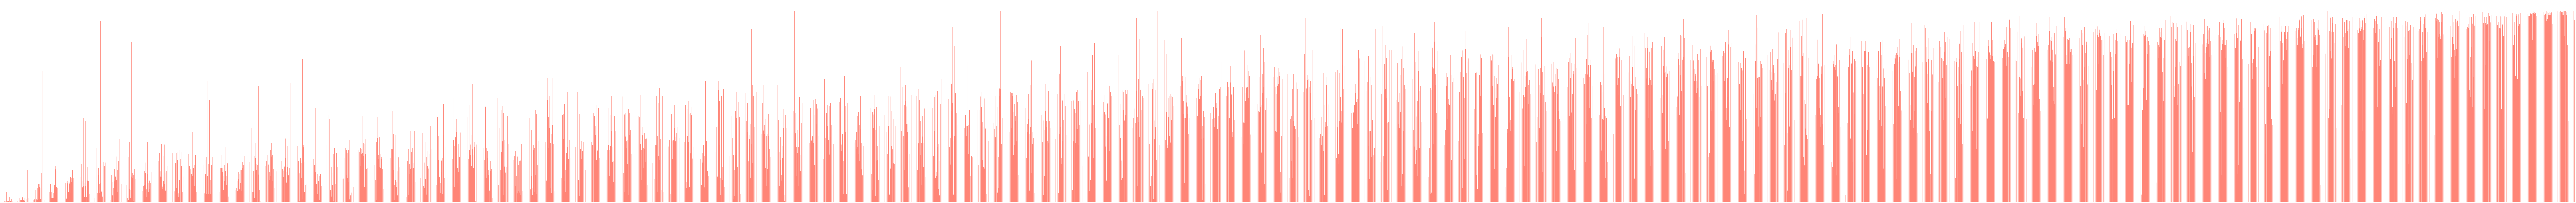

In [27]:
# get order between our prediction and George
dataset = pd.DataFrame(LA_joined)
order = get_order_BW_df(dataset, 14000, 300, save=False, plot=True)

In [79]:
combined_df = pd.DataFrame(LA_joined)
combined_df['albedo_diff'] = combined_df['Scored Lab_right'] - combined_df['Scored Lab_left']

In [80]:
combined_df.to_csv('change_2009-2012.csv',encoding='utf8')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


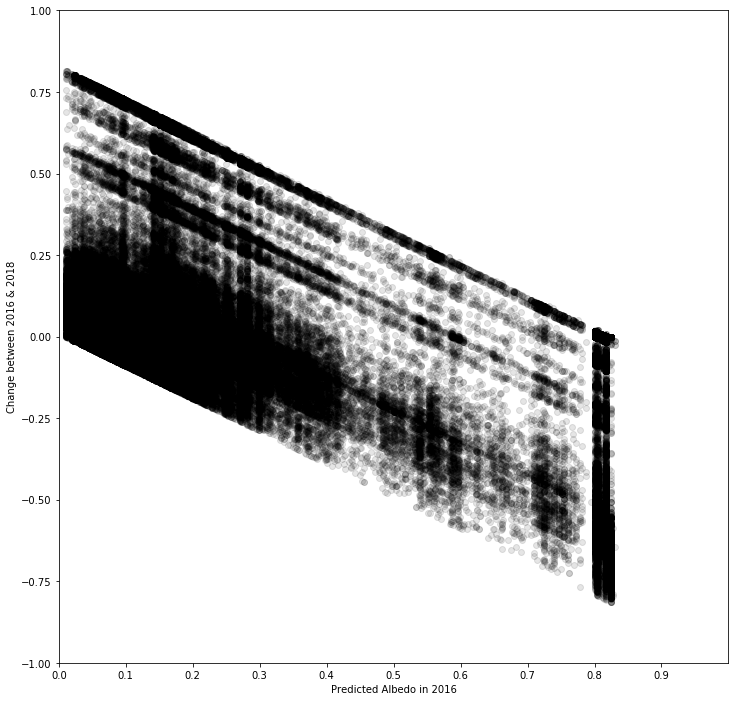

In [49]:
# George suggested scatterplot
combined_df['ScoredLabels_2009']=combined_df['Scored Lab_left']

x = combined_df.ScoredLabels_2009.dropna()
y = combined_df.albedo_diff.dropna()

colors = (0,0,0)

# Plot
plt.figure(figsize=(12,12))
plt.axis([0, 1, -1, 1])
plt.scatter(x, y,  c=colors, alpha=0.1)
plt.xticks(np.arange(0, 1, 0.1),fontsize=10)
# plt.title('Change in albedo')
plt.xlabel('Predicted Albedo in 2016')
plt.ylabel('Change between 2016 & 2018')
plt.show()

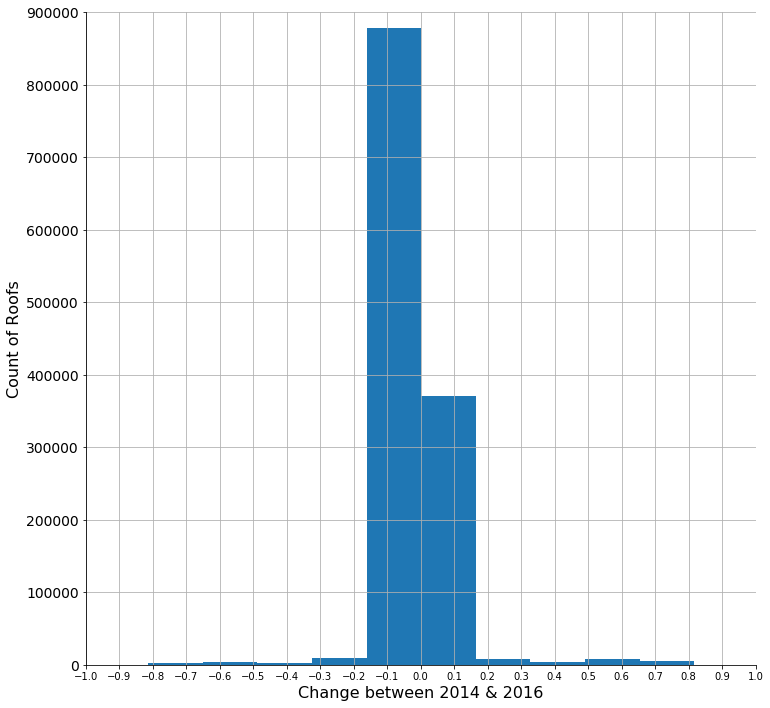

In [77]:
x = combined_df.albedo_diff.dropna()
plt.figure(figsize=(12,12))
plt.hist(x)

plt.grid()    
plt.axis([-1, 1, 0, 900000])
plt.xlabel("Change between 2014 & 2016", fontsize=16)  
plt.ylabel("Count of Roofs", fontsize=16)
plt.xticks(np.arange(-1, 1.01, 0.1),fontsize=10)  
plt.yticks(np.arange(0, 950000, 100000),fontsize=14)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()